# **2. Machine Learning for Regression**

In [253]:
import numpy as np
import pandas as pd

## **2.2 Data Prerparation**

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2024-10-07 09:54:02--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2024-10-07 09:54:02 (20.5 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [326]:
df=pd.read_csv('data.csv')

In [327]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [328]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [329]:
# We can see that the column names are inconsistent.
# 1. Some columns start with uppercase and some start with lowercase.
# 2. Some column names have space and some have underscore.
# To make all the column names consistent, we can make them lower case and replace the spaces with underscores (_)
df.columns=df.columns.str.lower().str.replace(' ','_')

In [330]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [331]:
# Similary we can see the Row values are inconsistent.
# Some rows are in uppercase, some are in lowercase, etc. We only need to format the String cells.
df.dtypes # Getting the values type for each column.

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [332]:
#Selecting only columns with 'object' type, i.e. String type
# Each column is a Series with an index. Accessing the index for column name and converting it to a list
string_cols= list(df.dtypes[df.dtypes=='object'].index)
string_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [333]:
# To make all the rows consistent, we can make them lower case and replace the spaces with underscores (_)
for col in string_cols:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [334]:
df.head() # Row values are cleaned up and properly formatted

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## **2.3 Exploratory Data Analysis**

In [263]:
for col in df.columns:
    print(f"Column: '{col}'")
    print(f"The first 5 uinique values in column '{col}': \n {df[col].unique()[:5]}")
    print(f"Total unique values in column '{col}': {df[col].nunique()}")
    print()

Column: 'make'
The first 5 uinique values in column 'make': 
 ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Total unique values in column 'make': 48

Column: 'model'
The first 5 uinique values in column 'model': 
 ['1_series_m' '1_series' '100' '124_spider' '190-class']
Total unique values in column 'model': 914

Column: 'year'
The first 5 uinique values in column 'year': 
 [2011 2012 2013 1992 1993]
Total unique values in column 'year': 28

Column: 'engine_fuel_type'
The first 5 uinique values in column 'engine_fuel_type': 
 ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Total unique values in column 'engine_fuel_type': 10

Column: 'engine_hp'
The first 5 uinique values in column 'engine_hp': 
 [335. 300. 230. 320. 172.]
Total unique values in column 'engine_hp': 356

Column: 'engine_cylinders'
The first 5 uinique values in column 'engine_cylinders': 
 [ 6.  4.  5.  8. 12.]
Total unique values in column 'engi

### Distribution of price
- Visualizing the price column

In [264]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
%matplotlib --list

Available matplotlib backends: ['agg', 'auto', 'cairo', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtk4', 'gtk4agg', 'gtk4cairo', 'inline', 'macosx', 'module://matplotlib_inline.backend_inline', 'nbagg', 'notebook', 'osx', 'pdf', 'pgf', 'ps', 'qt', 'qt5', 'qt5agg', 'qt5cairo', 'qt6', 'qtagg', 'qtcairo', 'svg', 'template', 'tk', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wx', 'wxagg', 'wxcairo']


Text(0.5, 1.0, 'Distribution of prices')

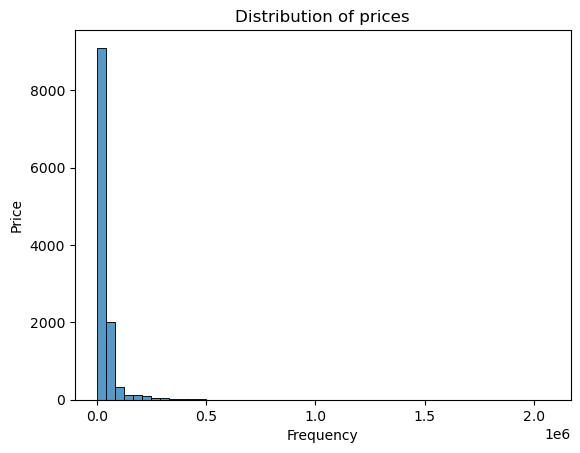

In [267]:
sns.histplot(df.msrp, bins=50)
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.title("Distribution of prices")
# plt.show()

Text(0.5, 1.0, 'Distribution of prices')

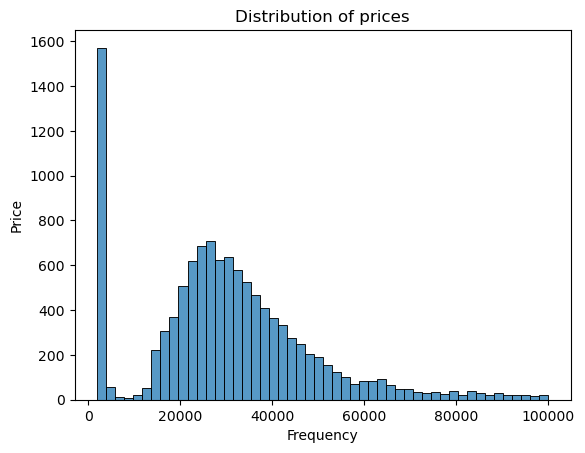

In [268]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.title("Distribution of prices")
# plt.show()

- The above distribution is a long tail distribution. It has it's advantages and disadvantages - https://portable.io/learn/long-tail-data
- To get rid of the long tail distribution plotted above, we transform our data into logarithmic values.

In [269]:
np.log([1,10,1000,10000])

array([0.        , 2.30258509, 6.90775528, 9.21034037])

In [270]:
np.log([0+1,1+1,10+1,1000+1,10000+1]) #To account for 0 as log(0) is undefined

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

- If we have zeros (0's) in our data so the model will be not that much accurate hence here we use **'np.log1p'** and it turns zeros value to x+1 then no values in the data will be zero.
- We shoulf be careful while inverting this as we will need to adjust the exponent too. Numpy has a function for that as well, as follows- **'np.exp1m'**

In [271]:
np.log1p([0,1,10,1000,10000])

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

In [272]:
np.expm1([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

array([0.00000000e+00, 9.99999999e-01, 9.99999997e+00, 1.00000000e+03,
       1.00000000e+04])

Text(0.5, 1.0, 'Distribution of prices after log tranformation')

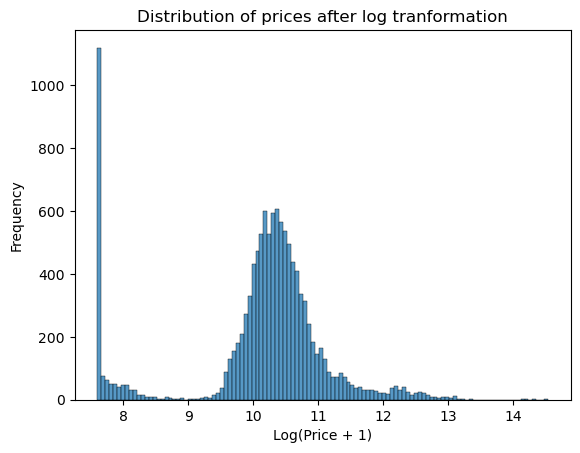

In [273]:
price_logs= np.log1p(df.msrp)
sns.histplot(price_logs)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

The above distribution with a bell shaped plot is called a normal distribution.

### Missing values

In [274]:
# Total count of missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [275]:
# Total count of available values
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

## **2.4 Setting up the validation framework**

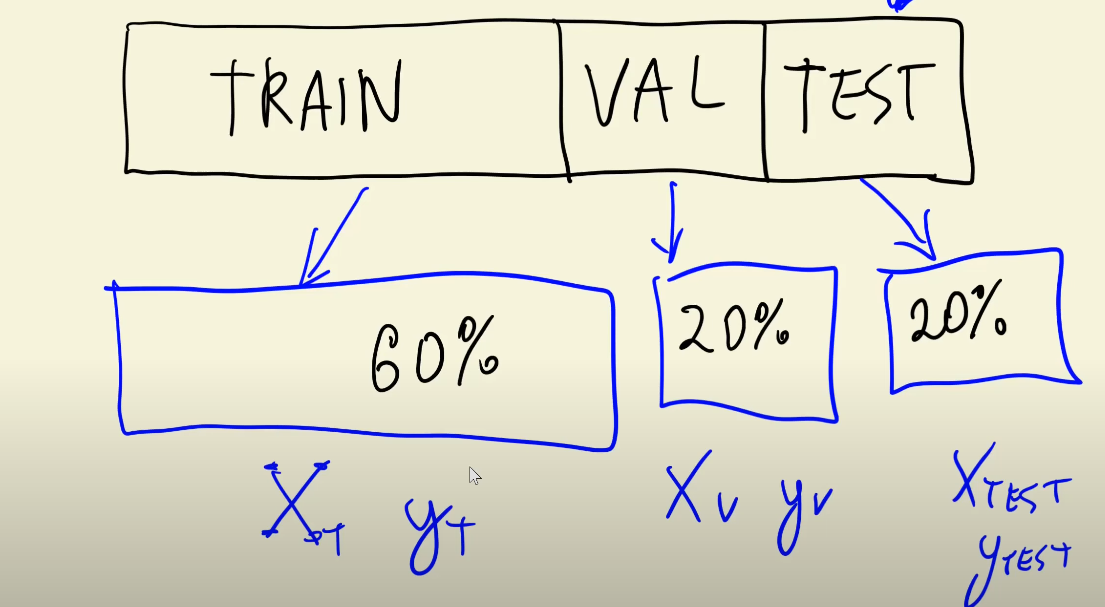

Splitting the data into train, validation and test data.

In [276]:
n=len(df)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=int(n*0.6)

In [277]:
n, n_train+n_val+n_test

(11914, 11912)

We can see above the total data size is not equal to n_train+n_val+n_test because of rounding off to integer.
To overcome this we take $$ n\_train = n-(n\_test+n\_val) $$

In [278]:
n_train = n- (n_test+n_val)

In [279]:
n, n_val+n_test+ n_train

(11914, 11914)

In [280]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [281]:
df_train=df.iloc[:n_train]
df_val=df.iloc[n_train:n_train+n_val]
df_test=df.iloc[n_train+n_val:]

In [282]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [283]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,47575
9533,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,31940
9534,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385,38335
9535,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,35870
9536,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385,28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [284]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


We can see above that the data is sequential. For e.g. the validation data contains all the cars with lincoln but he training data doesn't. To ensure the three partitions contains non sequential records we need to shuffle the dataset.

In [335]:
idx=np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [336]:
np.random.seed(2) #To make the shuffling reproducible we assign a seed to the random function
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [337]:
df_shuffled = df.iloc[idx]

In [338]:
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_train+n_val:].copy()

In [339]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [340]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [341]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [292]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

df_train, df_val, df_test -> We can see the random indice in the dataframe which is not required. So, we can reset the indices for convenience.

In [342]:
df_train.reset_index(drop=True,inplace=True)
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [343]:
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

Next, we will perform log1p transformation on our msrp (price) column to transorm the data into a normal distribution.

In [344]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [345]:
y_train, y_val, y_test

(array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
        12.62248099, 10.54061978]),
 array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
         9.77542688, 10.1924563 ]),
 array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
        10.00789261, 10.40414162]))

We need to delete the price column from our dataframe to avoid accidentally using it for training the model.

In [346]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [347]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

## **2.5 Linear Regression**

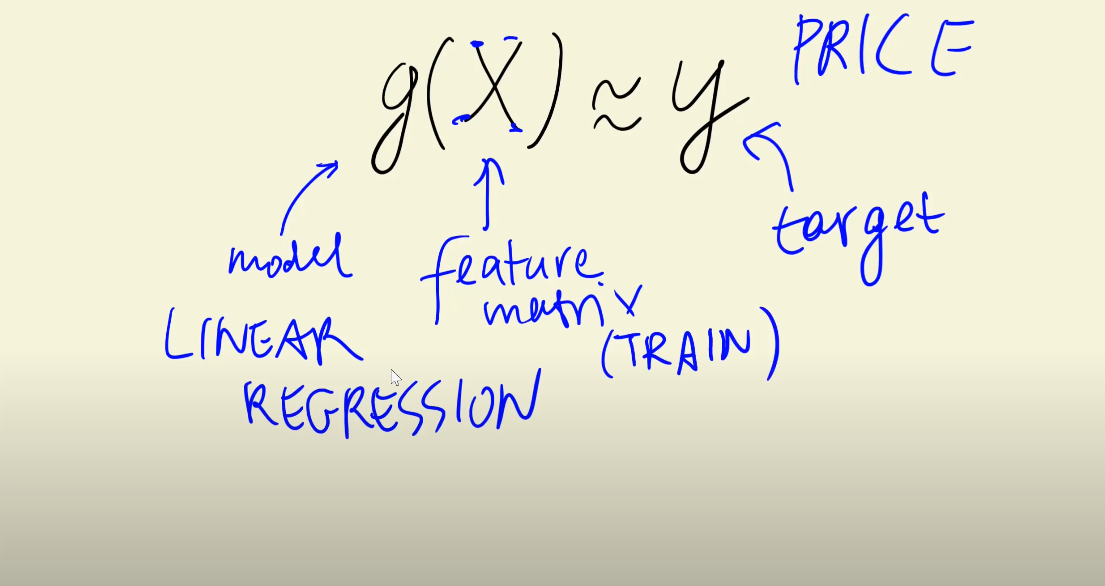
X -> Entire feature matrix

Looking at a single car
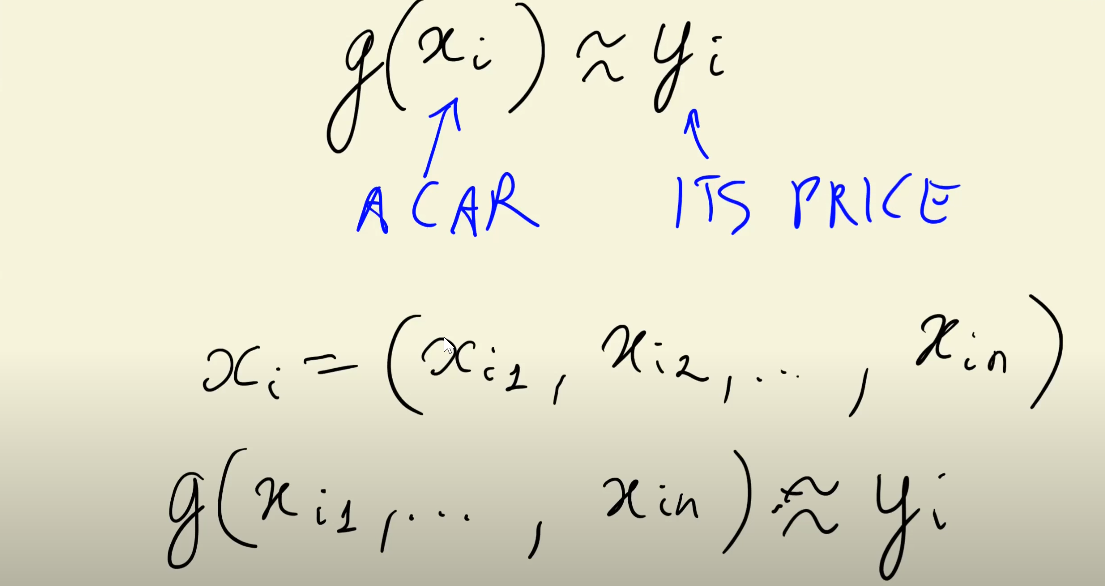

In [299]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

For e.g. we are looking at the 10th row in the training dataframe.
We will use engine_hp, city_mpg and popularity as example features.

In [300]:
xi=[df_train.iloc[10].engine_hp,df_train.iloc[10].city_mpg,df_train.iloc[10].popularity]
xi

[453.0, 11, 86]

In [104]:
def g(xi):
    # Do something
    return 10000 #price

### **Implementation**

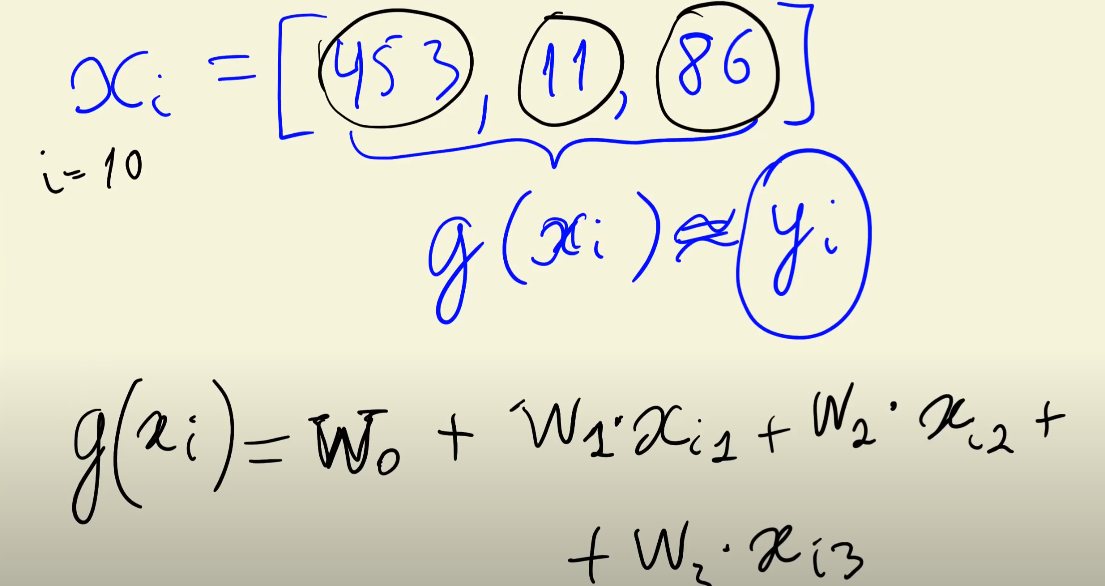

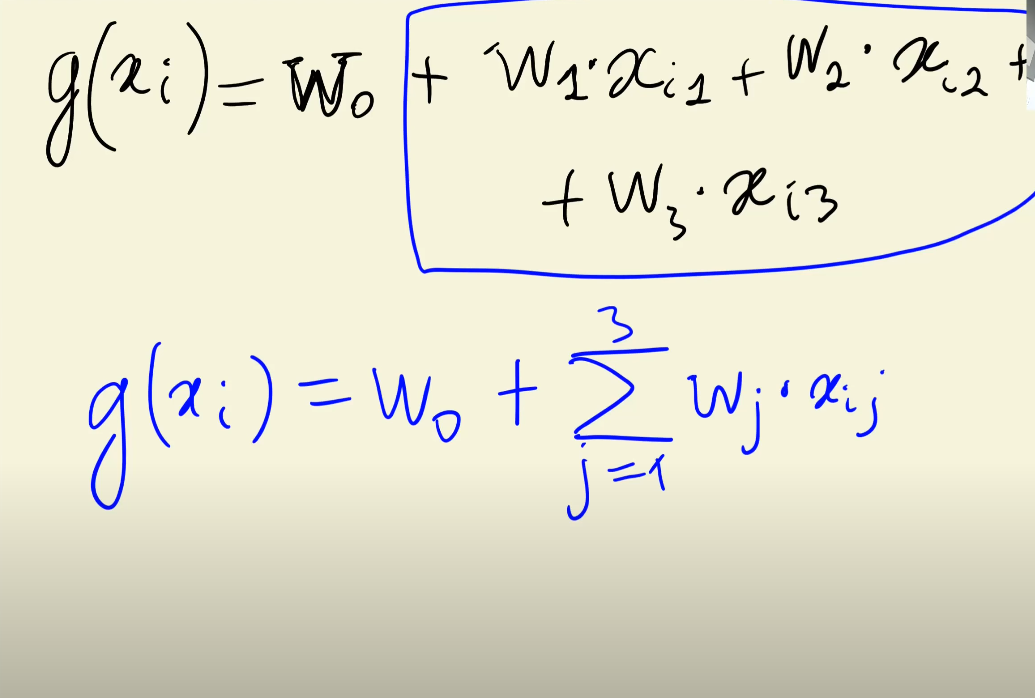

In [111]:
w0=7.17
w=[.01,0.04,0.002]

In [112]:
def linear_regression(xi):
    n=len(xi)
    pred=w0

    for j in range(n):
        pred=pred+w[j]*xi[j]
        
    return pred

In [118]:
price_log=linear_regression(xi)
price_log

14.463999999999999

In [116]:
price=np.expm1(price_log)
f"The price of the car is {price}"

'The price of the car is 1912648.4778852586'

In [117]:
np.log1p(price)

14.463999999999999

## **2.6 Linear Regression vector form**

In [348]:
def dot(xi,w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res += xi[j]*w[j]
    return res

In [349]:
def linear_regression(xi):
    # return w0+dot(xi,w) Old value
    xi = [1]+xi
    return dot(xi,w_new)

In [123]:
linear_regression(xi) #Old result

14.464

In [125]:
w_new = [w0]+w
w_new

[7.17, 0.01, 0.04, 0.002]

In [127]:
linear_regression(xi) # New result

14.463999999999999

We can represent all the training data in the below form
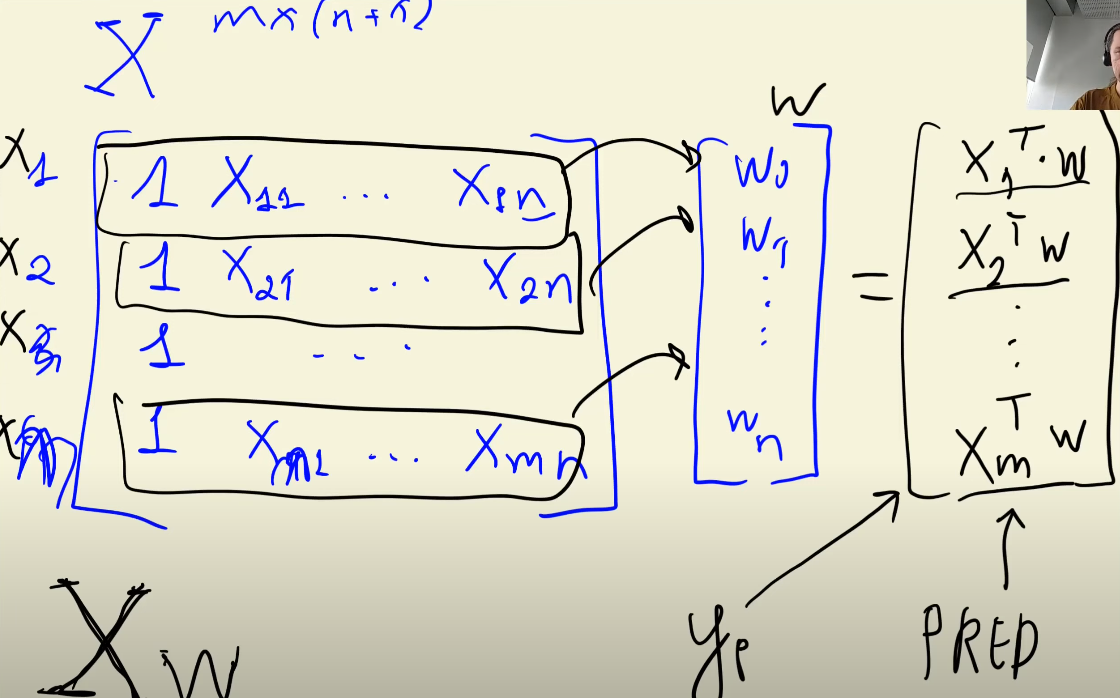

In [130]:
# To summarize
w0=7.17
w=[.01,0.04,0.002]
w_new=[w0]+w

In [131]:
x1 = [1, 148, 24, 1384]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1384],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [132]:
def linear_regression(X):
    return X.dot(w_new)

In [133]:
linear_regression(X)

array([12.378, 13.552, 12.312])

## **2.7 Training Linear Regression: Normal Equation**

We want the linear function $$g(X)=X*w$$ to be equal to y.
This is possible if $$X^{-1}$$ exists. Then our solution for the weights matrix will $$ w=X^{-1}*y$$

Since our feature matrix X is not a square matrix, which is usually in most cases, the inverse of the matrix X doesn't exist.
To overcome this we use the inverse of the Gram matrix: $$X^{T}X$$
$$(X^{T}X)^{-1}*(X^{T}X)*w= (X^{T}X)^{-1}*X^{T}*y$$
which can be reduced to $$w= (X^{T}X)^{-1}*X^{T}*y$$

In [134]:
def train_linear_regression(X,y):
    pass

In [161]:
X =[[148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [148]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [150]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.300e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [176]:
y=[10000,20000,150000,25000,10000,20000,15000,25000,12000]

In [151]:
XTX = X.T@X

In [152]:
XTX_inv = np.linalg.inv(XTX)

In [157]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 5.85010420e+04,  4.65650702e+01, -1.32228057e+03, -9.49937532e+00])

In [158]:
w0 = w_full[0]
w = w_full[1:]

In [159]:
w0, w

(58501.04202450313, array([   46.56507017, -1322.2805666 ,    -9.49937532]))

In [1]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T@X
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [304]:
train_linear_regression(X,y)

(46397.417507259146, array([   72.94473813, -1071.7415399 ,    -8.1139859 ]))

## **2.8 Car price baseline model**

In [351]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [352]:
base=['engine_hp','engine_cylinders','highway_mpg',
      'city_mpg','popularity']

In [353]:
X_train = df_train[base].values

In [354]:
train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [355]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

We can see there are missing values present in the training dataframe.
We can fill the missing values with 0 to overcome nan in our model. This will ignore the features with missing values. We can also fill the missing values with mean but to simplify the code we are filling them with 0.

In [356]:
X_train = df_train[base].fillna(0).values

In [357]:
w0, w = train_linear_regression(X_train,y_train)

In [358]:
y_pred = w0 + X_train.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

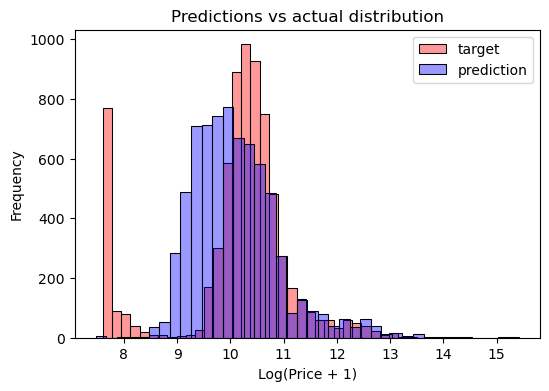

In [359]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.4, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

## **2.9 RMSE**

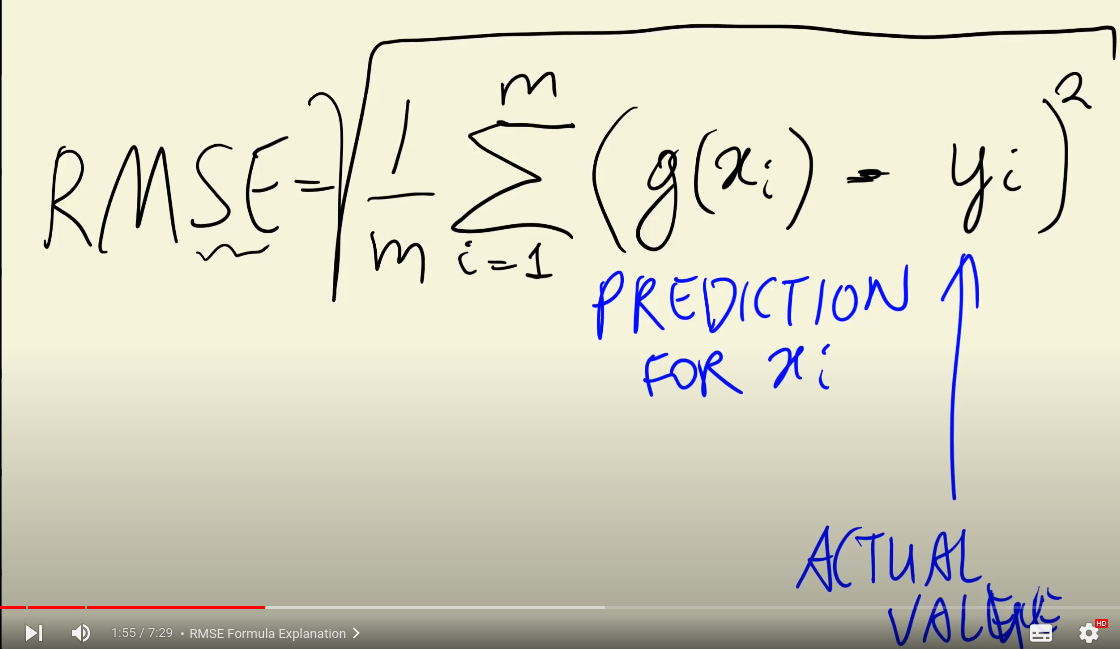

In [360]:
def rmse(y, y_pred):
    se=(y- y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

## **2.10 Validating the model**

In [361]:
base=['engine_hp','engine_cylinders','highway_mpg',
      'city_mpg','popularity']

In [362]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [363]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
print(f"RMSE between y_train and y_pred: {rmse(y_train, y_pred)}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print(f"RMSE between y_val and y_pred: {rmse(y_val, y_pred)}")

RMSE between y_train and y_pred: 0.7554192603920132
RMSE between y_val and y_pred: 0.7616530991301601


## **2.11 Simple feature engineering**

In [316]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [364]:
def prepare_X(df):
    df=df.copy() # Taking a copy to avoid modifying the original dataframe
    
    features = base.copy()
    df['age'] = 2017 - df_train.year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [365]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
print(f"RMSE between y_train and y_pred: {rmse(y_train, y_pred)}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print(f"RMSE between y_val and y_pred: {rmse(y_val, y_pred)}")

RMSE between y_train and y_pred: 0.5175055465840046
RMSE between y_val and y_pred: 1.1083438396770795


In [366]:
(X_train[:,-1]>0).sum()

6175

Text(0.5, 1.0, 'Predictions vs actual distribution')

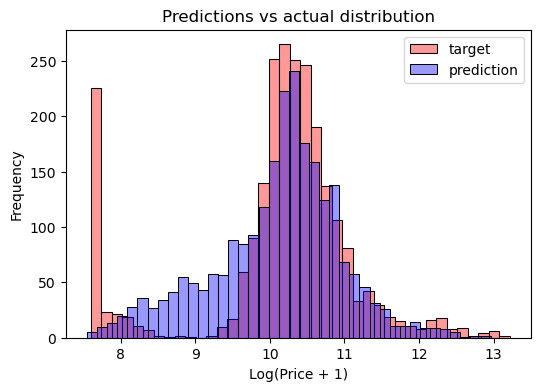

In [367]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='red', alpha=0.4, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

## **2.12 Categorical variables**

In [368]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [369]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [370]:
def prepare_X(df):
    df=df.copy() # Taking a copy to avoid modifying the original dataframe
    
    features = base.copy()
    df['age'] = 2017 - df_train.year
    features.append('age')

    for v in [2,3,4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
        
    makes = list(df.make.value_counts().head().index)
    for v in makes:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [371]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
print(f"RMSE between y_train and y_pred: {rmse(y_train, y_pred)}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print(f"RMSE between y_val and y_pred: {rmse(y_val, y_pred)}")

RMSE between y_train and y_pred: 0.5058876515487503
RMSE between y_val and y_pred: 1.1222453305340683


In [372]:
makes = list(df.make.value_counts().head().index)

In [373]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
print(f"RMSE between y_train and y_pred: {rmse(y_train, y_pred)}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print(f"RMSE between y_val and y_pred: {rmse(y_val, y_pred)}")

RMSE between y_train and y_pred: 0.5058876515487503
RMSE between y_val and y_pred: 1.1222453305340683


In [375]:
list(df_train.dtypes.index)

['make',
 'model',
 'year',
 'engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [377]:
categorical_variables = ['make','engine_fuel_type','transmission_type', 'driven_wheels','number_of_doors',
              'market_category', 'vehicle_size', 'vehicle_style']

In [378]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [379]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'number_of_doors': [4.0, 2.0, 3.0],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [382]:
def prepare_X(df):
    df=df.copy() # Taking a copy to avoid modifying the original dataframe
    
    features = base.copy()
    df['age'] = 2017 - df_train.year
    features.append('age')

    for v in [2,3,4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
        
    for c, values in categories.items():    
        for v in values:
            feature = '%s_%s' % (c,v)
            df[feature] = (df[c] == v).astype(int)
            features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [383]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
print(f"RMSE between y_train and y_pred: {rmse(y_train, y_pred)}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print(f"RMSE between y_val and y_pred: {rmse(y_val, y_pred)}")

RMSE between y_train and y_pred: 9986.719190298201
RMSE between y_val and y_pred: 11283.356140200061


In [384]:
w0, w

(1.2141744393183498e+17,
 array([ 2.27724065e+01,  4.88260264e+03,  1.07187936e+03,  1.76045409e+02,
         1.10365454e+00,  6.29634918e+02,  5.97182170e+16, -2.26063583e+17,
        -5.83262499e+16, -5.61240515e+01, -9.12760742e+01,  1.42672056e+02,
        -2.71161510e+01, -5.67567630e+01,  2.30044877e+03,  2.15440797e+03,
         2.22285866e+03,  2.37224290e+03,  2.07986156e+03, -1.15168403e+17,
        -1.15168403e+17, -1.15168403e+17, -1.15168403e+17, -1.15168403e+17,
        -6.24904084e+15, -6.24904084e+15, -6.24904084e+15, -6.24904084e+15,
         5.83262499e+16, -5.97182170e+16,  2.26063583e+17, -7.13315960e+01,
         3.77148594e+01, -5.35090867e+00, -5.24634607e-01,  4.04210668e+01,
         3.47067077e+02,  3.79918236e+02,  3.29279859e+02, -4.85492239e-02,
         5.44797374e-02,  1.78241160e-01,  3.41906701e-01, -1.64412078e-01]))

## **2.13 Regularization**

In [385]:
def train_linear_regression_reg(X,y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T@X
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [409]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train,r=100)
y_pred = w0 + X_train.dot(w)
print(f"RMSE between y_train and y_pred: {rmse(y_train, y_pred)}")

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

print(f"RMSE between y_val and y_pred: {rmse(y_val, y_pred)}")

RMSE between y_train and y_pred: 0.5695913617800608
RMSE between y_val and y_pred: 0.8999300983787789


In [407]:
reg = [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 1000, 1100, 1500, 2000, 10000]
score = float('inf')
optimal_r=0
for r in reg:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train,y_train,r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    if(rmse(y_val, y_pred)<score):
        score = rmse(y_val, y_pred)
        optimal_r=r

In [408]:
optimal_r

100

In [410]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train,optimal_r)
    
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print(f"RMSE between y_val and y_pred: {rmse(y_val, y_pred)}")

RMSE between y_val and y_pred: 0.8999300983787789


In [413]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
print(f"RMSE between y_val and y_pred:{rmse(y_test, y_pred)}")

RMSE between y_val and y_pred:0.9230993937950306


## **2.15 Using the model**

In [414]:
df_full_train = pd.concat([df_train, df_val])

In [416]:
df_full_train.reset_index(drop=True, inplace=True)

In [417]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [419]:
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train,y_val])

w0, w = train_linear_regression_reg(X_full_train,y_full_train,r=100)

In [420]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
print(f"RMSE between y_val and y_pred:{rmse(y_test, y_pred)}")

RMSE between y_val and y_pred:0.7604292578663607
